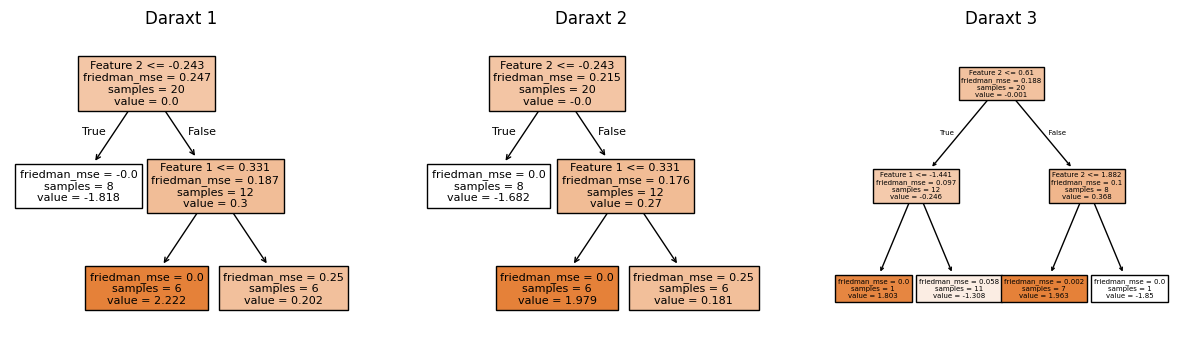

In [1]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Kichkina dataset (faqat 2 feature)
X, y = make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

# Model
gb_clf = GradientBoostingClassifier(n_estimators=3, max_depth=2, random_state=42)
gb_clf.fit(X, y)

# Daraxtlarni chizamiz
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, ax in enumerate(axes):
    plot_tree(gb_clf.estimators_[i, 0], filled=True, feature_names=["Feature 1", "Feature 2"], ax=ax)
    ax.set_title(f"Daraxt {i+1}")
plt.show()


Step 1: Residual variance = 8.1970
Step 2: Residual variance = 7.0086
Step 3: Residual variance = 5.9344


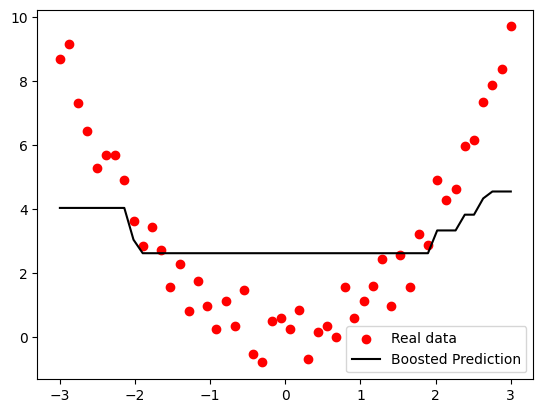

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# 1. Data yaratamiz
X = np.linspace(-3, 3, 50).reshape(-1, 1)   # 50 ta nuqta
y = X[:, 0]**2 + np.random.randn(50) * 0.5  # kvadrat + shovqin

# 2. Boshlang'ich model (mean bilan)
y_pred = np.full_like(y, y.mean(), dtype=float)

# Gradient Boosting step-by-step
trees = []
learning_rate = 0.1

for step in range(3):  # faqat 3 ta daraxt o‘rnatamiz
    residual = y - y_pred   # 3. residual
    
    # 4. residualni o‘rganish
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residual)
    trees.append(tree)
    
    # 5. yangi daraxt prediksini qo‘shamiz
    update = tree.predict(X)
    y_pred += learning_rate * update
    
    print(f"Step {step+1}: Residual variance = {np.var(residual):.4f}")

# Grafik
plt.scatter(X, y, color="red", label="Real data")
plt.plot(X, y_pred, color="black", label="Boosted Prediction")
plt.legend()
plt.show()


In [14]:
X = np.linspace(-3, 3, 50).reshape(-1, 1)   # 50 ta nuqta
y = X[:, 0]**2 + np.random.randn(50) * 0.5  # kvadrat + shovqin

# 2. Boshlang'ich model (mean bilan)
y_pred = np.full_like(y, y.mean(), dtype=float)


In [17]:
trees = []
learning_rate = 0.1

residual = y - y_pred

In [22]:
y, y_pred

(array([ 9.0231706 ,  7.73626179,  7.41825158,  7.19438481,  6.18110156,
         5.75805582,  4.79097164,  3.30099649,  4.42160993,  3.3023634 ,
         2.24593414,  2.71406826,  2.28077695,  1.88816593,  1.07101016,
         1.58477961,  0.19914976,  1.72660473, -0.29960667,  0.62462667,
         1.05769052,  0.12179176,  1.25686637,  0.26319652,  0.88168953,
         0.36441586,  0.41430174,  0.22398773, -0.34454053,  0.50006354,
         0.05503157,  0.78469232,  1.70947671,  1.83575024,  2.12980862,
         1.77117799,  2.42380011,  2.59974371,  2.688543  ,  3.02689906,
         3.57555496,  3.7645435 ,  5.53595251,  5.01200164,  5.32716181,
         5.20190785,  6.56131449,  6.63838547,  7.91861581,  9.96979465]),
 array([3.12864592, 3.12864592, 3.12864592, 3.12864592, 3.12864592,
        3.12864592, 3.12864592, 3.12864592, 3.12864592, 3.12864592,
        3.12864592, 3.12864592, 3.12864592, 3.12864592, 3.12864592,
        3.12864592, 3.12864592, 3.12864592, 3.12864592, 3.128645

In [20]:
residual

array([ 5.89452468,  4.60761587,  4.28960566,  4.06573889,  3.05245564,
        2.62940989,  1.66232571,  0.17235056,  1.29296401,  0.17371748,
       -0.88271179, -0.41457766, -0.84786898, -1.24047999, -2.05763576,
       -1.54386631, -2.92949616, -1.40204119, -3.4282526 , -2.50401926,
       -2.0709554 , -3.00685417, -1.87177956, -2.8654494 , -2.2469564 ,
       -2.76423007, -2.71434419, -2.9046582 , -3.47318645, -2.62858239,
       -3.07361436, -2.34395361, -1.41916921, -1.29289568, -0.9988373 ,
       -1.35746793, -0.70484581, -0.52890221, -0.44010293, -0.10174687,
        0.44690904,  0.63589758,  2.40730658,  1.88335572,  2.19851589,
        2.07326193,  3.43266857,  3.50973955,  4.78996989,  6.84114873])

In [ ]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, residual)
trees.append(tree)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset yaratamiz
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_classes=2, random_state=42)

# Train-test bo‘linadi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=5, learning_rate=0.5, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict
y_pred = gb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("First 10 predictions:", y_pred[:10])
print("First 10 true labels:", y_test[:10])

Accuracy: 0.94
First 10 predictions: [1 0 1 0 1 1 0 1 0 1]
First 10 true labels: [1 0 1 0 1 1 0 1 0 1]


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=5, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.init_log_odds = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self, X, y):
        # Step 1: Initial prediction (log odds)
        pos_ratio = np.mean(y)
        self.init_log_odds = np.log(pos_ratio / (1 - pos_ratio))  

        # Start with raw scores = constant prediction
        raw_scores = np.full(y.shape, self.init_log_odds)

        # Iteratively train weak learners
        for i in range(self.n_estimators):
            # Step 2: Compute probabilities
            probs = self._sigmoid(raw_scores)

            # Step 3: Compute gradient (negative gradient of log loss)
            gradient = y - probs

            # Step 4: Fit regression tree on gradient
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, gradient)

            # Step 5: Update raw scores with tree prediction
            update = self.learning_rate * tree.predict(X)
            raw_scores += update  

            self.trees.append(tree)

    def predict_proba(self, X):
        # Start with initial score
        raw_scores = np.full((X.shape[0],), self.init_log_odds)
        # Add contributions of all trees
        for tree in self.trees:
            raw_scores += self.learning_rate * tree.predict(X)
        probs = self._sigmoid(raw_scores)
        return np.vstack([1 - probs, probs]).T

    def predict(self, X):
        probs = self.predict_proba(X)[:, 1]
        return (probs >= 0.5).astype(int)


# -----------------------
# TEST QILAMIZ
# -----------------------
X, y = make_classification(n_samples=500, n_features=5, n_informative=3, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = MyGradientBoostingClassifier(n_estimators=5, learning_rate=0.5, max_depth=3)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("First 10 predictions:", y_pred[:10])
print("First 10 true labels:", y_test[:10])


Accuracy: 0.92
First 10 predictions: [1 0 1 0 1 1 0 1 0 1]
First 10 true labels: [1 0 1 0 1 1 0 1 0 1]
